In [45]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("credit_card_transactions.csv")


In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [46]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            19963 non-null  int64  
 1   Card            19963 non-null  int64  
 2   Year            19963 non-null  int64  
 3   Month           19963 non-null  int64  
 4   Day             19963 non-null  int64  
 5   Time            19963 non-null  object 
 6   Amount          19963 non-null  object 
 7   Use Chip        19963 non-null  object 
 8   Merchant Name   19963 non-null  int64  
 9   Merchant City   19963 non-null  object 
 10  Merchant State  18646 non-null  object 
 11  Zip             18316 non-null  float64
 12  MCC             19963 non-null  int64  
 13  Errors?         574 non-null    object 
 14  Is Fraud?       19963 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.3+ MB


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [47]:
df["Amount"] = df["Amount"].astype(str).str.replace("$", "").astype(float)

In [49]:
df["Hours"] = df["Time"].str[0:2]
df["Minute"] = df["Time"].str[3:5]

In [51]:
df = df.drop("Time",axis=1)

In [62]:
show_unique = ["Merchant Name","Merchant City","Merchant State","Use Chip"]
for column in show_unique:
    unique_values = data[column].nunique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Merchant Name: 552
Unique values for Merchant City: 295
Unique values for Merchant State: 40
Unique values for Use Chip: 0


In [94]:
# Assuming df is your DataFrame
df['Zip'] = df['Zip'].fillna(df['Zip'].mode().iloc[0])

In [96]:
df['Zip'] = label_encoder.fit_transform(df['Zip'])

In [97]:
df

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hours,Minute
0,0,0,2002,9,1,134.09,0,370,123,3,281,5300,8,0,06,21
1,0,0,2002,9,1,38.48,0,254,159,3,283,5411,8,0,06,42
2,0,0,2002,9,2,120.34,0,254,159,3,283,5411,8,0,06,22
3,0,0,2002,9,2,128.95,0,366,159,3,283,5651,8,0,17,45
4,0,0,2002,9,3,104.71,0,447,123,3,281,5912,8,0,06,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,9.71,0,389,123,3,281,5411,7,0,13,03
19959,0,4,2009,2,22,27.94,0,25,123,3,281,5211,8,0,11,58
19960,0,4,2009,2,24,13.97,0,432,99,3,261,5912,8,0,16,53
19961,0,4,2009,3,29,14.27,0,389,123,3,281,5411,8,0,16,30


In [92]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")


User: 0
Card: 0
Year: 0
Month: 0
Day: 0
Amount: 0
Use Chip: 0
Merchant Name: 0
Merchant City: 0
Merchant State: 0
Zip: 1647
MCC: 0
Errors?: 0
Is Fraud?: 0
Hours: 0
Minute: 0


In [68]:
for column in show_unique:
    df[column] = label_encoder.fit_transform(data[column])

In [73]:
df["Errors?"] = df['Errors?'].fillna('No Error')


In [74]:
df["Errors?"] = label_encoder.fit_transform(data["Errors?"])

In [76]:
df["Is Fraud?"] = label_encoder.fit_transform(data["Is Fraud?"])

In [98]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Is Fraud?'].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > 0.1].index


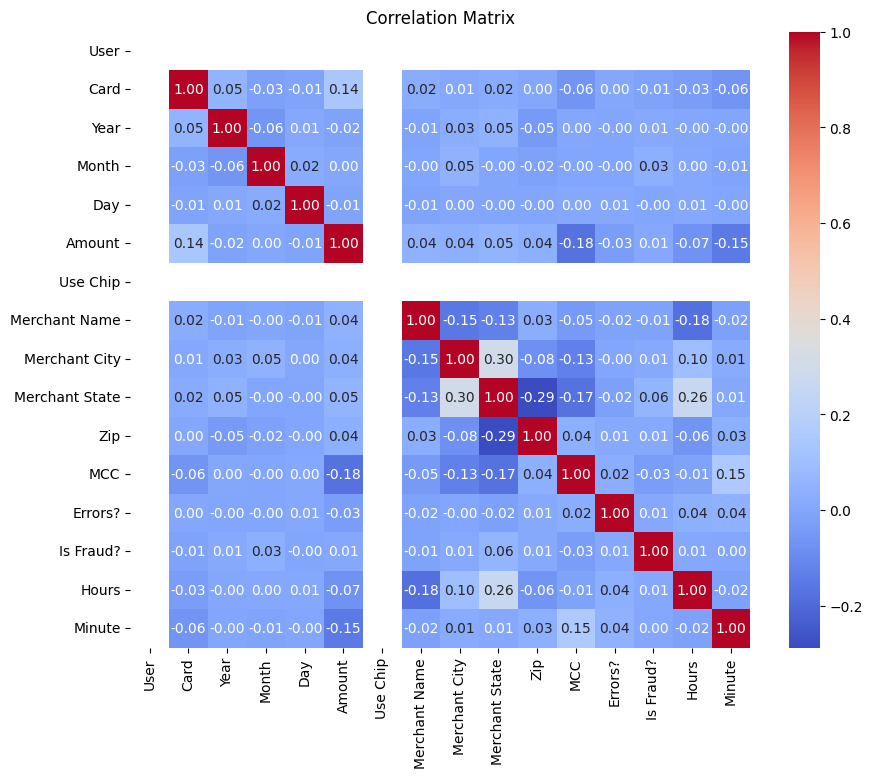

Selected Features:
Index(['Is Fraud?', 'Merchant State', 'MCC', 'Month'], dtype='object')


In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Print or visualize selected features
print("Selected Features:")
print(selected_features)

In [101]:
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

In [104]:
mutual_info_values = mutual_info_classif(X, y)
selected_features = X.columns[mutual_info_values > 0.01]

In [117]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Is Fraud?'].abs().sort_values(ascending=False)

# Set a threshold for correlation strength
threshold = 0  # Adjust the threshold as needed

# Select columns with correlation above the threshold
selected_features = target_correlation[target_correlation != threshold].index

# Display the selected features
print(f"Selected features: {selected_features}")

# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

Selected features: Index(['Is Fraud?', 'Merchant State', 'MCC', 'Month', 'Merchant City',
       'Merchant Name', 'Card', 'Zip', 'Year', 'Hours', 'Amount', 'Errors?',
       'Minute', 'Day', 'User', 'Use Chip'],
      dtype='object')


In [118]:
# Assuming df is your DataFrame
spearman_corr_matrix = df.corr(method='spearman')

# Extract correlation values for a specific variable (e.g., 'Is Fraud?')
target_spearman_corr = spearman_corr_matrix['Is Fraud?']

# Print correlation values
print("Spearman's Rank Correlation with 'Is Fraud?':")
print(target_spearman_corr)

Spearman's Rank Correlation with 'Is Fraud?':
User                   NaN
Card             -0.009453
Year              0.011233
Month             0.030019
Day              -0.001570
Amount            0.007601
Use Chip               NaN
Merchant Name    -0.011601
Merchant City     0.023733
Merchant State    0.047167
Zip              -0.001772
MCC              -0.031629
Errors?           0.006332
Is Fraud?         1.000000
Hours             0.020898
Minute            0.003666
Name: Is Fraud?, dtype: float64


In [125]:
df_transformed = df[["Year","Month","Merchant Name","Merchant City","MCC","Hours","Minute","Is Fraud?"]]

In [129]:
df_transformed.loc[:, 'Hours'] = pd.to_numeric(df_transformed['Hours'], errors='coerce')
df_transformed.loc[:, 'Minute'] = pd.to_numeric(df_transformed['Minute'], errors='coerce')

In [131]:
df_transformed

,Year,Month,Merchant Name,Merchant City,MCC,Hours,Minute,Is Fraud?
0,2002,9,370,123,5300,6,21,0
1,2002,9,254,159,5411,6,42,0
2,2002,9,254,159,5411,6,22,0
3,2002,9,366,159,5651,17,45,0
4,2002,9,447,123,5912,6,23,0
...,...,...,...,...,...,...,...,...
19958,2009,2,389,123,5411,13,3,0
19959,2009,2,25,123,5211,11,58,0
19960,2009,2,432,99,5912,16,53,0
19961,2009,3,389,123,5411,16,30,0


In [132]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df_transformed, test_size=0.2, random_state=42)

In [133]:
# Extract features and labels
X_train = train_data[['Year', 'Month', 'Merchant Name', 'Merchant City', 'MCC', 'Hours', 'Minute']].values
y_train = train_data['Is Fraud?'].values
X_test = test_data[['Year', 'Month', 'Merchant Name', 'Merchant City', 'MCC', 'Hours', 'Minute']].values
y_test = test_data['Is Fraud?'].values

In [134]:
# Standardize numerical features
scaler = StandardScaler()
X_train[:, :5] = scaler.fit_transform(X_train[:, :5])
X_test[:, :5] = scaler.transform(X_test[:, :5])

In [135]:

# Convert 'Hours' and 'Minute' to numeric
X_train[:, 5:] = X_train[:, 5:].astype(float)
X_test[:, 5:] = X_test[:, 5:].astype(float)

In [137]:
# Define a simple DNN model
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
        
# Initialize the DNN model
input_size = X_train.shape[1]
model = DNN(input_size)

In [157]:
input_size

7

In [138]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [139]:
# Training loop
epochs = 10
for epoch in range(epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.7813299298286438
Epoch 2/10, Loss: 0.108552485704422
Epoch 3/10, Loss: 0.0506480373442173
Epoch 4/10, Loss: 0.03456849232316017
Epoch 5/10, Loss: 0.028804564848542213
Epoch 6/10, Loss: 0.027186425402760506
Epoch 7/10, Loss: 0.027490995824337006
Epoch 8/10, Loss: 0.02876708097755909
Epoch 9/10, Loss: 0.030481228604912758
Epoch 10/10, Loss: 0.032335005700588226


In [143]:
# Save the model
torch.save(model.state_dict(), 'Fraud_Dectection_model.pth')

In [144]:
df_transformed.head(5)

,Year,Month,Merchant Name,Merchant City,MCC,Hours,Minute,Is Fraud?
0,2002,9,370,123,5300,6,21,0
1,2002,9,254,159,5411,6,42,0
2,2002,9,254,159,5411,6,22,0
3,2002,9,366,159,5651,17,45,0
4,2002,9,447,123,5912,6,23,0


In [142]:
# Evaluation on the test set
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    test_outputs = model(test_inputs)
    predicted_labels = (test_outputs >= 0.5).float().squeeze()

    accuracy = accuracy_score(y_test, predicted_labels.numpy())
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9992486851990984
